In [3]:
import re
from stemming.porter2 import stem
from nltk.corpus import stopwords
import numpy as np

In [4]:
import nltk
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/shozy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
import re
from typing import Counter
from matplotlib import pyplot as plt
from stemming.porter2 import stem
from nltk.corpus import stopwords
from wordcloud import WordCloud


def get_file_words(filename: str) -> list[str]:
    with open(filename) as file:
        text = file.read()
    return text

def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    return text

def remove_stop_words(words: list[str]) -> str:
    return [word for word in words if word not in stop_words]

def stem_words(words: list[str]) -> str:
    return [stem(word) for word in words]

def task1(filename: str):
    text = get_file_words(filename)
    text = preprocess_text(text)
    words = text.split()
    words = remove_stop_words(words)
    words = stem_words(words)
    word_counts = Counter(words)

    # removing most common words
    word_counts = word_counts.most_common()[5:]

    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(word_counts))
    plt.figure(figsize=(4, 2))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


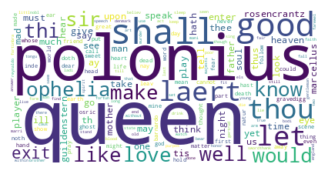

In [6]:
task1('data/hamlet.txt')

In [34]:
import math


def preprocess_document(text:str):
    words = text.split()
    words = remove_stop_words(words)
    words = stem_words(words)
    return words

def make_term_frequency(words: list[str]) -> dict[str, float]:
    return {
        k: v/len(words) 
        for k, v in Counter(words).items()
    }


def make_tf_idf(documents: list[list[str]]) -> list[dict[str, float]]:
    all_words = set()
    for doc in documents:
        all_words = all_words.union(set(doc))

    tfs = [make_term_frequency(document) for document in documents]
    idf = dict()

    for word in all_words:
        doc_count = sum(word in doc for doc in documents)
        idf[word] = math.log((len(documents)+1) / (1 + doc_count)) + 1

        if word == 'hamlet':
            print(f"{idf["hamlet"]=} {(1 + doc_count)=} {(len(documents)+1)=}")
    


    tf_idfs = []
    for tf in tfs:
        tf_idf = dict()
        for word in all_words:
            term_frequency_of_word = tf.get(word, 0)
            idf_word = idf[word]

            word_tf_idf = term_frequency_of_word * idf_word

            tf_idf[word] = word_tf_idf
            if term_frequency_of_word == 0:
                pass
                # print(word, tf_idf, term_frequency_of_word, idf_word)
            
        tf_idfs.append(tf_idf)

    
    return tf_idfs

def make_wordcloud(i, tf_idf: dict[str, float]):
    tupled = list(tf_idf.items())
    tupled.sort(key=lambda x: x[1], reverse=True)

    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(tupled))
    plt.figure(figsize=(4, 2))
    plt.title(f"Act {i}")
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    


def task2(filename: str):
    text = get_file_words(filename)
    text = preprocess_text(text)
    documents = re.split(r"act \d", text)
    documents = [preprocess_document(doc) for doc in documents]
    tf_idfs = make_tf_idf(documents)

    # for i, tf_idf in enumerate(tf_idfs):
    #     make_wordcloud(i, tf_idf)

    
    



In [35]:
task2('data/hamlet.txt')

idf["hamlet"]=1.0 (1 + doc_count)=7 (len(documents)+1)=7


In [36]:
def find_best_document(word: str, documents: list[dict[str, float]]) -> list[tuple[int, float]]:
    matches = []
    for i, tf_idf in enumerate(documents):
        matches.append((i, tf_idf.get(word, -np.inf)))

    matches.sort(key=lambda x: x[1], reverse=True)
    print(matches)

def task3(filename: str):
    text = get_file_words(filename)
    text = preprocess_text(text)
    documents = re.split(r"act \d", text)
    documents = [preprocess_document(doc) for doc in documents]
    tf_idfs = make_tf_idf(documents)

    find_best_document("friend", tf_idfs)
    find_best_document("hamlet", tf_idfs)

In [37]:
task3('data/hamlet.txt')

idf["hamlet"]=1.0 (1 + doc_count)=7 (len(documents)+1)=7
[(0, 0.008547008547008548), (2, 0.004081632653061225), (1, 0.002466429158673609), (4, 0.0021606049693914295), (3, 0.00126806999746386), (5, 0.00033178500331785003)]
[(0, 0.05128205128205128), (5, 0.04280026542800265), (3, 0.03195536393608927), (1, 0.026582625376815567), (2, 0.023809523809523808), (4, 0.018005041411595247)]


In [51]:
from collections import defaultdict
import random

def pick_random_weight(weights: dict[str, float]) -> str:
    sum_weights = sum(weights.values())
    random_num = random.random() * (sum_weights)
    for elem, weight in weights.items():
        if random_num < weight:
            return elem
        random_num -= weight

def generate_paragraph(counters: dict[str: dict[str, float]], tfs: dict[str, float]) -> str:
    words = []
    start_word = pick_random_weight(tfs)
    
    while len(words) < 30:
        words.append(start_word)
        start_word = pick_random_weight(counters[start_word])
    
    return " ".join(words)



def task4(filename: str):
    text = get_file_words(filename)
    text = preprocess_text(text)
    words = text.split()
    words = remove_stop_words(words)
    words = stem_words(words)

    afterword_freqs = defaultdict(list)
    for i in range(len(words)-1):
        afterword_freqs[words[i]].append(words[i+1])
    
    freqs = dict(afterword_freqs)
    counters = {
        k: dict(Counter(v).most_common(5)) for k,v in freqs.items()
    }
    tfs = make_term_frequency(words)
    print(generate_paragraph(counters, tfs) )

task4('data/hamlet.txt')
    


never gave us go back school wittenberg horatio lord hamlet hamlet ay good lord hamlet come hither come come hamlet come hamlet ay lord king queen polonius polonius lord polonius
